In [38]:
%matplotlib widget
import jungfrau_utils as ju
import numpy as np
import json, h5py, copy
import os, glob
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm2
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from ipyfilechooser import FileChooser
from scipy.stats.stats import pearsonr

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *

import warnings
warnings.filterwarnings('ignore')

## choose file either with the run number (first cell) or widget (second cell)

In [45]:
pgroup='p20774'
runnumber = 164
print ('run: {:04d}'.format(runnumber))

#############################################################
jsonfile = ''
jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, runnumber))[0]
titlestring = str( pgroup + ' --- ' +jsonfile.split('/')[-3])
jsonfile

run: 0164


'/sf/alvra/data/p20774/raw/run0164-RuRh_RhL3_monoscan_nolaser/meta/scan.json'

In [40]:
#fc = FileChooser('/sf/alvra/data/p19634/raw/')
#fc.use_dir_icons = True
#display(fc)

In [41]:
#jsonfile = copy.copy(fc.selected)
#jsonfile

In [46]:
quantile_corr = 0.5

detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero122

#######################################################################################################33
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

#(DataFluo, Izero, correlation, Energy_eV) = \
#XAS_scan_1diode_static(scan, detector_XAS, detector_Izero, quantile_corr)

(DataFluo1, DataFluo2, IzeroFEL, correlation1, correlation2, Energy_eV) = \
 XAS_scan_2diodes_static(scan, detector_XAS_1, detector_XAS_2, detector_Izero, quantile_corr)

Processing: run0164-RuRh_RhL3_monoscan_nolaser
Step 68 of 68: Processing acq0068

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet   1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH1_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-GES1:CH2_VAL_GET  1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY 1001 / 1001 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 1001 / 1001 -> 0% loss
complete channels: 4 / 4 -> 0% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
(499,) shots out of (1001,) survived
(499,) shots out of (1001,) survived
Step 68 of 68: Processed acq0068
correlation Diode1 (all shots) = 0.9943772766185289
correlation Diode2 (all shots) = 0.990215716052168


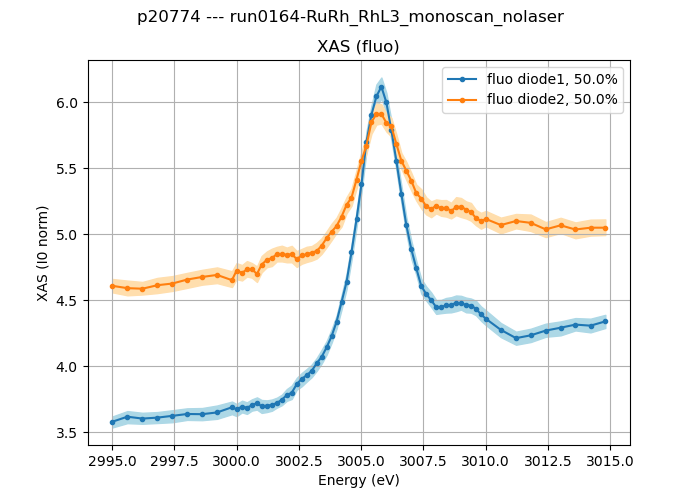

In [47]:
plt.figure(figsize = (7,5))
plt.suptitle(titlestring, fontsize = 12)

XAS1 = DataFluo1[:,0]
err_low1 = DataFluo1[:,1]
err_high1 = DataFluo1[:,2]

XAS2 = DataFluo2[:,0]
err_low2 = DataFluo2[:,1]
err_high2 = DataFluo2[:,2]

plt.plot(Energy_eV, XAS1, label='{}, {}%'.format('fluo diode1', quantile_corr*100),marker='.')
plt.fill_between(Energy_eV, err_low1, err_high1, color='lightblue')

plt.plot(Energy_eV, XAS2, label='{}, {}%'.format('fluo diode2', quantile_corr*100),marker='.')
plt.fill_between(Energy_eV, err_low2, err_high2, color='navajowhite')


plt.xlabel("Energy (eV)")
plt.ylabel ("XAS (I0 norm)")
plt.gca().set_title('XAS (fluo)')
plt.legend(loc="best")
plt.grid()

plt.show()

#plt.savefig(savedir+'/XANES_RhAcac.png')

## Check correlation for a certain energy point

(499,) shots out of (1001,) survived


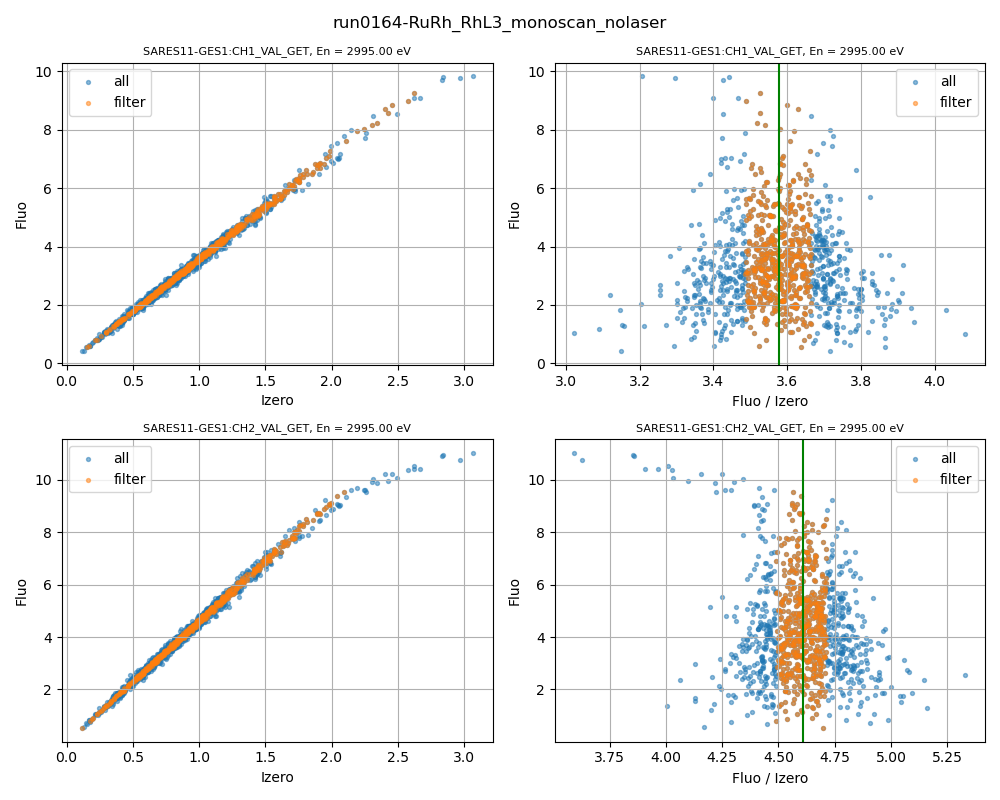

In [48]:
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
Energy_eV = scan.readbacks

chosen_energy = 2840.8

detector_XAS = channel_diode_1
detector_Izero = channel_Izero122

quantile_corr = 0.5
##################################################################3
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo, Izero, Fluo_filter, Izero_filter) = \
Get_correlation_from_scan_static(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

fig,ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle(jsonfile.split('/')[-3], fontsize = 12)

ax[0][0].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[0][0].scatter(Izero, Fluo, s=8, alpha = 0.5,  label = 'all')
ax[0][0].scatter(Izero_filter, Fluo_filter, s=8, alpha = 0.5, label='filter')
ax[0][0].legend(loc='best')
ax[0][0].set_xlabel('Izero')
ax[0][0].set_ylabel('Fluo')
ax[0][0].grid()

m_median_filter = np.median(Fluo_filter/Izero_filter)

ax[0][1].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[0][1].scatter(Fluo/Izero, Fluo, s=8, alpha = 0.5,  label = 'all')
ax[0][1].scatter(Fluo_filter/Izero_filter, Fluo_filter, s=8, alpha = 0.5, label='filter')
ax[0][1].legend(loc='best')
ax[0][1].set_xlabel('Fluo / Izero')
ax[0][1].set_ylabel('Fluo')
ax[0][1].axvline(x=m_median_filter, color = 'green')
ax[0][1].grid()

#################################################################

detector_XAS = channel_diode_2

#################################################################
from sfdata import SFScanInfo
scan = SFScanInfo(jsonfile)
scan = remove_JF_from_scan(scan)

index_energy = np.arange(len(Energy_eV))[(Energy_eV > chosen_energy)][0]

(Fluo, Izero, Fluo_filter, Izero_filter) = \
Get_correlation_from_scan_static(scan, index_energy, detector_XAS, detector_Izero, quantile_corr)

ax[1][0].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[1][0].scatter(Izero, Fluo, s=8, alpha = 0.5,  label = 'all')
ax[1][0].scatter(Izero_filter, Fluo_filter, s=8, alpha = 0.5, label='filter')
ax[1][0].legend(loc='best')
ax[1][0].set_xlabel('Izero')
ax[1][0].set_ylabel('Fluo')
ax[1][0].grid()

m_median_filter = np.median(Fluo_filter/Izero_filter)

ax[1][1].set_title('{}, En = {:.2f} eV'.format(detector_XAS,Energy_eV[index_energy]),fontsize=8)
ax[1][1].scatter(Fluo/Izero, Fluo, s=8, alpha = 0.5,  label = 'all')
ax[1][1].scatter(Fluo_filter/Izero_filter, Fluo_filter, s=8, alpha = 0.5, label='filter')
ax[1][1].legend(loc='best')
ax[1][1].set_xlabel('Fluo / Izero')
ax[1][1].set_ylabel('Fluo')
ax[1][1].axvline(x=m_median_filter, color = 'green')
ax[1][1].grid()

plt.tight_layout()

#### plt.figure(figsize=(6,6))
plt.suptitle('Energy = {:.2f} eV <------ {}'.format(Energy_eV[index_energy], scan.files[index_energy][1].split('/')[-1].split('.')[0]))
plt.scatter(Izero_filter, Fluo_filter)
plt.scatter(Izero, Fluo, s = 0.5)
plt.xlabel('Izero')
plt.ylabel('Fluo')
plt.grid()
plt.show()